In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error



In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

categorical =[]
numerical = []
for i in df.columns:
    if df[i].dtypes == 'O':    #In pandas categorical features are object type
        categorical.append(i)
    else:
        numerical.append(i)
categorical_fatures = df[categorical]
numerical_features = df[numerical]

In [6]:
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False,drop='first')  #drop='first' to avoid dummy variable trap.
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [7]:
len(df_encoded.columns)

191

In [8]:
X= df_encoded.drop('price',axis=1)
y = df_encoded['price']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (143, 190)
y_train shape =  (143,)
x_test shape =  (62, 190)
y_test shape =  (62,)


In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
LinearModel = LinearRegression()
LinearModel.fit(x_test_scaled,y_test)

LinearRegression()

In [13]:
y_predict_linear_model = LinearModel.predict(x_test_scaled)
y_predict_linear_model[0:5]

array([30760.   , 17859.167,  9549.   , 11850.   , 28248.   ])

In [19]:
LM_Predict = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict_linear_model,'Difference':[a - p for a, p in zip(y_test, y_predict_linear_model)]})
pd.options.display.float_format = '{:.2f}'.format
LM_Predict.head(10)

,Actual Value,Predicted Value,Difference
15,30760.00,30760.00,0.00
9,17859.17,17859.17,0.00
100,9549.00,9549.00,-0.00
132,11850.00,11850.00,-0.00
68,28248.00,28248.00,0.00
95,7799.00,7799.00,0.00
159,7788.00,7788.00,-0.00
162,9258.00,9258.00,-0.00
147,10198.00,10198.00,-0.00
182,7775.00,7775.00,-0.00


In [15]:
R_Square = r2_score(y_test,y_predict_linear_model)
AME = mean_absolute_error(y_test,y_predict_linear_model)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_linear_model))
MAPE = '{:.2f}%'.format(mean_absolute_percentage_error(y_test,y_predict_linear_model))


series= pd.Series({'R-Square':R_Square,'AME':AME,'RMSE':RMSE,'MAPE':MAPE})
metric = pd.DataFrame(series,columns=['Value'])
metric.index.name = 'Accuracy Metrics'
metric.T

Accuracy Metrics,R-Square,AME,RMSE,MAPE
Value,1.000000,0.000000,0.000000,0.00%


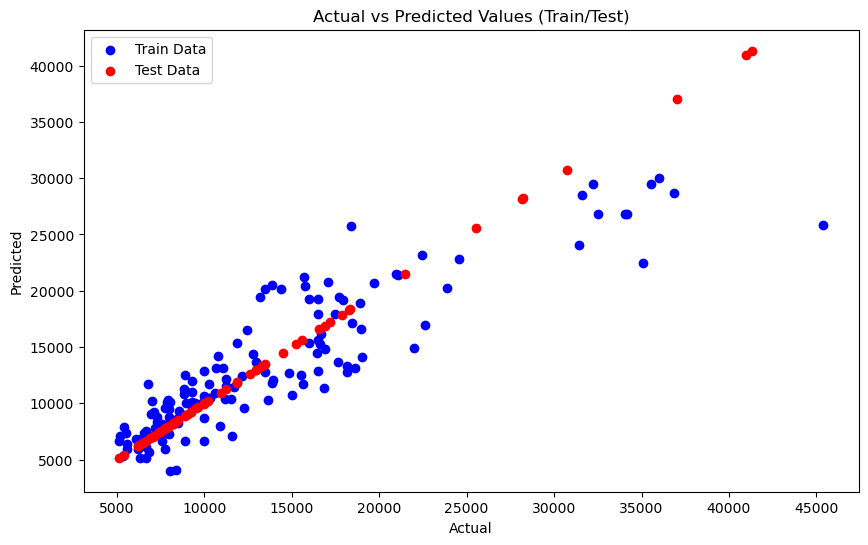

MSE of Train: 12899854.143740717
MSE of Test: 1.0146304126557702e-22
R_Square of Train set: 0.7883521711407641
R_Square of Test set: 1.0


In [16]:
y_train_pred = LinearModel.predict(x_train_scaled)
# Calculate the mean squared error & R_square for both train and test predictions
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_predict_linear_model)
R_Square_train = r2_score(y_train, y_train_pred)
R_Square_test = r2_score(y_test, y_predict_linear_model)

# Plotting train & test data
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data')
plt.scatter(y_test, y_predict_linear_model, color='red', label='Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Train/Test)')
plt.legend()
plt.show()

print(f"MSE of Train: {mse_train}")
print(f"MSE of Test: {mse_test}")
print(f'R_Square of Train set: {R_Square_train}')
print(f'R_Square of Test set: {R_Square_test}')


fig = plt.figure(figsize=[10,8])
sns.histplot(y_train - y_train_pred, bins = 20, label='Train-error',kde=True)
sns.histplot(y_test - y_predict_linear_model, bins = 20, label='Test-error',kde=True)
plt.title('Error Terms For Train & Test data', fontsize = 17)             
plt.xlabel('Errors', fontsize = 15)
plt.legend(loc='best')
plt.show()